# 神经网络Neural Network

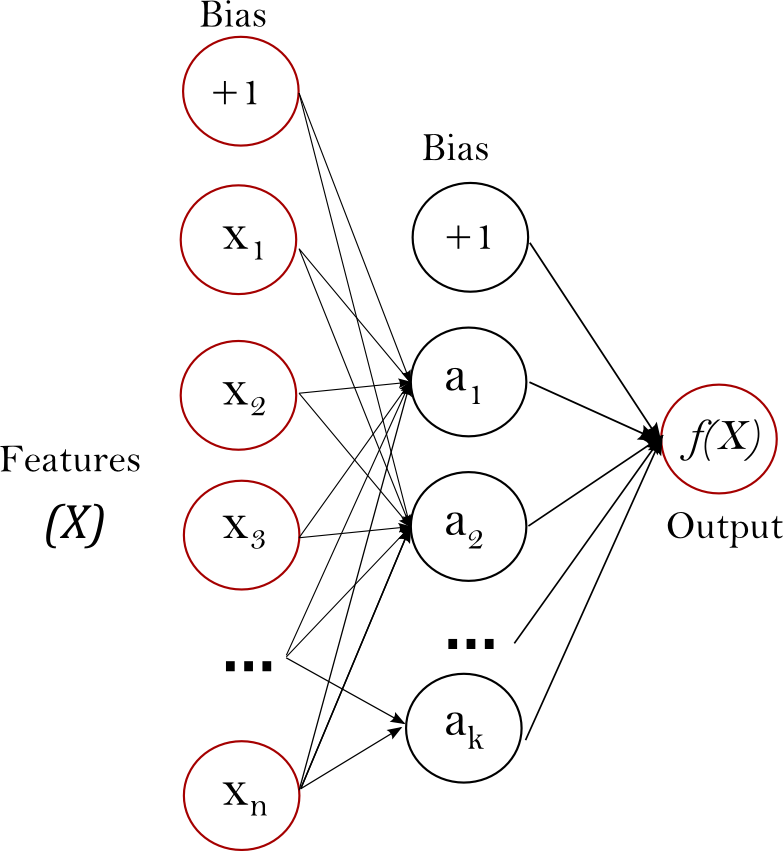

Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples:

## Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default 'adam'
    The solver for weight optimization.

    - 'lbfgs' is an optimizer in the family of quasi-Newton methods.

    - 'sgd' refers to stochastic gradient descent.

    - 'adam' refers to a stochastic gradient-based optimizer proposed
      by Kingma, Diederik, and Jimmy Ba

    Note: The default solver 'adam' works pretty well on relatively
    large datasets (with thousands of training samples or more) in terms of
    both training time and validation score.
    For small datasets, however, 'lbfgs' can converge faster and perform
    better.

alpha : float, optional, default 0.0001
    L2 penalty (regularization term) parameter.

batch_size : int, optional, default 'auto'
    Size of minibatches for stochastic optimizers.
    If the solver is 'lbfgs', the classifier will not use minibatch.
    When set to "auto", `batch_size=min(200, n_samples)`

learning_rate : {'constant', 'invscaling', 'adaptive'}, default 'constant'
    Learning rate schedule for weight updates.

    - 'constant' is a constant learning rate given by
      'learning_rate_init'.

    - 'invscaling' gradually decreases the learning rate ``learning_rate_``
      at each time step 't' using an inverse scaling exponent of 'power_t'.
      effective_learning_rate = learning_rate_init / pow(t, power_t)

    - 'adaptive' keeps the learning rate constant to
      'learning_rate_init' as long as training loss keeps decreasing.
      Each time two consecutive epochs fail to decrease training loss by at
      least tol, or fail to increase validation score by at least tol if
      'early_stopping' is on, the current learning rate is divided by 5.

    Only used when ``solver='sgd'``.

max_iter : int, optional, default 200
    Maximum number of iterations. The solver iterates until convergence
    (determined by 'tol') or this number of iterations.

random_state : int or RandomState, optional, default None
    State or seed for random number generator.

shuffle : bool, optional, default True
    Whether to shuffle samples in each iteration. Only used when
    solver='sgd' or 'adam'.

tol : float, optional, default 1e-4
    Tolerance for the optimization. When the loss or score is not improving
    by at least tol for two consecutive iterations, unless `learning_rate`
    is set to 'adaptive', convergence is considered to be reached and
    training stops.

learning_rate_init : double, optional, default 0.001
    The initial learning rate used. It controls the step-size
    in updating the weights. Only used when solver='sgd' or 'adam'.

power_t : double, optional, default 0.5
    The exponent for inverse scaling learning rate.
    It is used in updating effective learning rate when the learning_rate
    is set to 'invscaling'. Only used when solver='sgd'.

verbose : bool, optional, default False
    Whether to print progress messages to stdout.

warm_start : bool, optional, default False
    When set to True, reuse the solution of the previous
    call to fit as initialization, otherwise, just erase the
    previous solution.

momentum : float, default 0.9
    Momentum for gradient descent update. Should be between 0 and 1. Only
    used when solver='sgd'.

nesterovs_momentum : boolean, default True
    Whether to use Nesterov's momentum. Only used when solver='sgd' and
    momentum > 0.

early_stopping : bool, default False
    Whether to use early stopping to terminate training when validation
    score is not improving. If set to true, it will automatically set
    aside 10% of training data as validation and terminate training when
    validation score is not improving by at least tol for two consecutive
    epochs.
    Only effective when solver='sgd' or 'adam'

validation_fraction : float, optional, default 0.1
    The proportion of training data to set aside as validation set for
    early stopping. Must be between 0 and 1.
    Only used if early_stopping is True

beta_1 : float, optional, default 0.9
    Exponential decay rate for estimates of first moment vector in adam,
    should be in [0, 1). Only used when solver='adam'

beta_2 : float, optional, default 0.999
    Exponential decay rate for estimates of second moment vector in adam,
    should be in [0, 1). Only used when solver='adam'

epsilon : float, optional, default 1e-8
    Value for numerical stability in adam. Only used when solver='adam'

## Attributes
----------
`classes_` : array or list of array of shape (n_classes,)
    Class labels for each output.

`loss_` : float
    The current loss computed with the loss function.

`coefs_` : list, length n_layers - 1
    The ith element in the list represents the weight matrix corresponding
    to layer i.

`intercepts_` : list, length n_layers - 1
    The ith element in the list represents the bias vector corresponding to
    layer i + 1.

n_iter_ : int,
    The number of iterations the solver has ran.

n_layers_ : int
    Number of layers.

`n_outputs_` : int
    Number of outputs.

`out_activation_` : string
    Name of the output activation function.

## 【注意】
1. 特征X是(n_samples, n_features)的二维矩阵，标签y是(n_samples,)的一维数组
2. 在输入层，X是一个样本点一个样本点传进去的，因此*输入层的神经元个数一定等于特征个数！*
3. 在输出层，y是一个样本点一个样本点传出来的，因此*输出层的神经元个数一定等于标签个数！*

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
X = [[-1., -1.], [1., 1.], [1., 0.]]
# 【注意】样本点
y = [0, 1, 1]

In [20]:
# 1层隐含层的情况：hidden_layer_sizes=(5,)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,), random_state=1)
clf.fit(X, y) 
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [21]:
 [coef.shape for coef in clf.coefs_]

[(2, 5), (5, 1)]

In [22]:
# n层隐含层的情况：hidden_layer_sizes元组里有n个元素，分别代表这n层隐含层每层的神经元个数
# 例如3层的情况：hidden_layer_sizes=(5,6,3)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,6,3), random_state=1)
clf.fit(X, y) 
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [23]:
 [coef.shape for coef in clf.coefs_]

[(2, 5), (5, 6), (6, 3), (3, 1)]